In [1]:
import numpy as np
import matplotlib.pyplot as plt

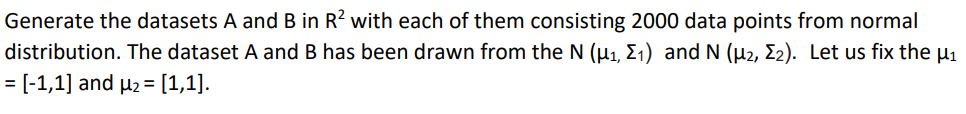

In [5]:
mue1 = np.array([-1,1])
mue2 = np.array([1,1])

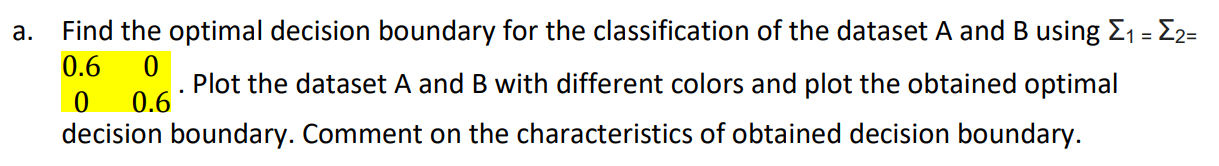

In [3]:
cov = [[0.6,0],[0,0.6]]
A = np.random.multivariate_normal(mue1, cov, 2000)
B = np.random.multivariate_normal(mue2, cov, 2000)
A.shape

(2000, 2)

In [74]:
'''### Another way

x = 1/2 * (mue1+mue2)
y = np.array([[x[0],i] for i in np.arange(-2,5)])
'''
w1=(1/0.6)*mue1
w2=(1/0.6)*mue2
w10=-0.5*(1/0.6)*(mue1.T).dot(mue1)
w20=-0.5*(1/0.6)*(mue2.T).dot(mue2)

x=(w20-w10) / (w1.T-w2.T) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


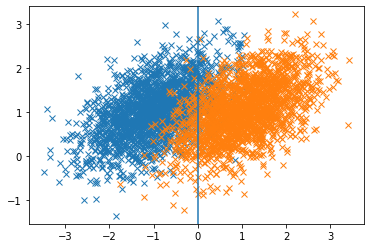

In [75]:
plt.plot(A[:, 0].reshape(-1,1), A[:, 1].reshape(-1,1), 'x')
plt.plot(B[:, 0].reshape(-1,1), B[:, 1].reshape(-1,1), 'x')
plt.axvline(x[0], ymin=-2,ymax=4) # if you have choose another way plt.plot(y[:,0].reshape(-1,1), y[:,1].reshape(-1,1))
plt.axis('equal')
plt.show()

In this case, I get point from var x which will be the point of line. Then by keeping value of x component of var x same but we'll have use different value of y component of var x to generate line on that point.

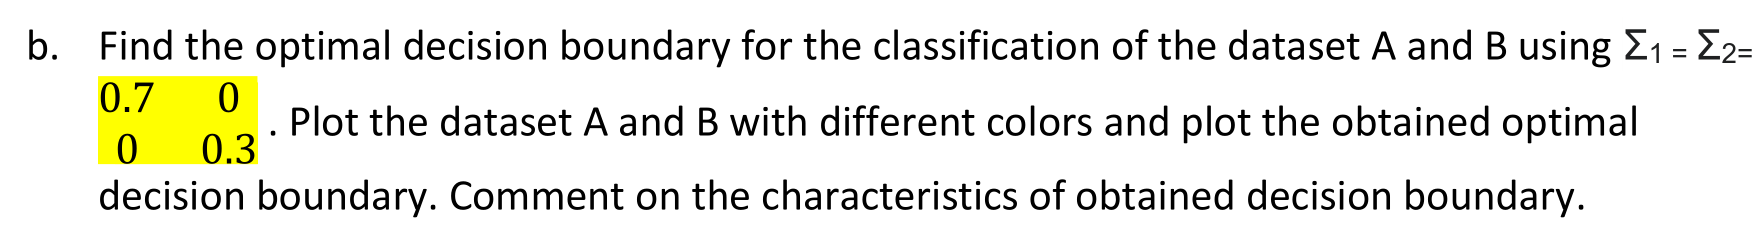

In [37]:
cov2 = np.array([[0.7,0],[0,0.3]])
A = np.random.multivariate_normal(mue1, cov2, 2000)
B = np.random.multivariate_normal(mue2, cov2, 2000)

In [77]:
cov2_inv = np.linalg.inv(cov2)
w1=cov2_inv@ mue1
w2=cov2_inv @ mue2
w10= -(1/2) * (mue1.T @ cov2_inv @ mue1)
w20= -(1/2) * (mue2.T @ cov2_inv @ mue2)
x=(w1.T-w2.T).dot(w20-w10)

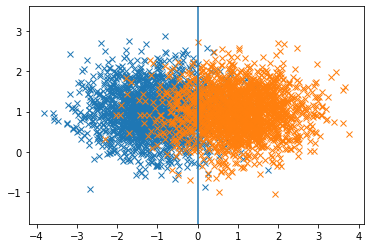

In [39]:
plt.plot(A[:, 0].reshape(-1,1), A[:, 1].reshape(-1,1), 'x')
plt.plot(B[:, 0].reshape(-1,1), B[:, 1].reshape(-1,1), 'x')
plt.axvline(x[0], ymin=-2,ymax=4) # if you have choose another way plt.plot(y[:,0].reshape(-1,1), y[:,1].reshape(-1,1))
plt.axis('equal')
plt.show()

In this case, we get point from var x which will be the point of line. Then by keeping value of x component of var x same but we'll have use different value of y component of var x to generate line on that point.

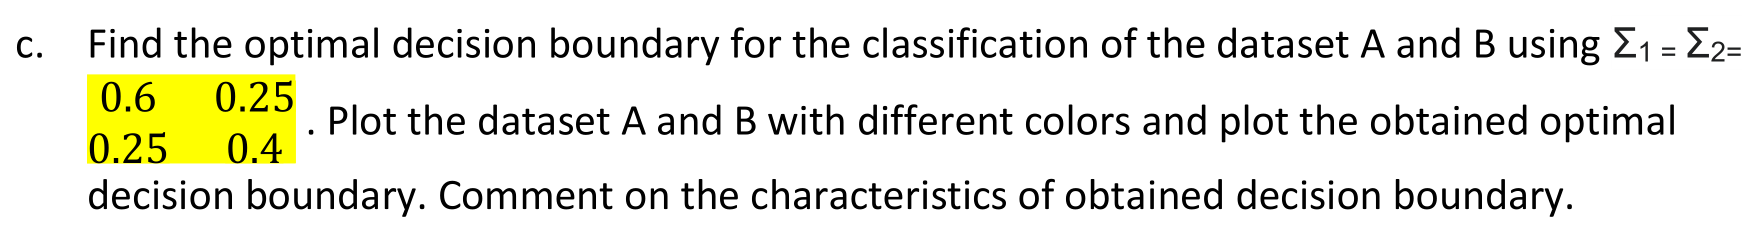

In [40]:
cov3 = np.array([[0.6,0.25],[0.25,0.4]])
A = np.random.multivariate_normal(mue1, cov3, 2000)
B = np.random.multivariate_normal(mue2, cov3, 2000)

In [44]:
w1_minus_w2 = w1 - w2 

In [68]:
cov3_inv = np.linalg.inv(cov3)
w1=cov3_inv @ mue1
w2=cov3_inv @ mue2
w10= -(1/2) * (mue1.T @ cov3_inv @ mue1)
w20= -(1/2) * (mue2.T @ cov3_inv @ mue2)
vals = np.linspace(-2,2,A.shape[0])
w1_minus_w2 = w1 - w2 
w10_minus_w20 = w10 - w20 

x = ((-w10_minus_w20) - (w1_minus_w2[0] * vals)) /(w1_minus_w2[1])

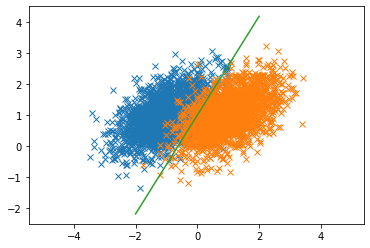

In [69]:
plt.plot(A[:, 0].reshape(-1,1), A[:, 1].reshape(-1,1), 'x')
plt.plot(B[:, 0].reshape(-1,1), B[:, 1].reshape(-1,1), 'x')
plt.plot(vals.reshape(-1,1), x.reshape(-1,1))
#plt.axvline(A[:,0], x)
plt.axis('equal')
plt.show()

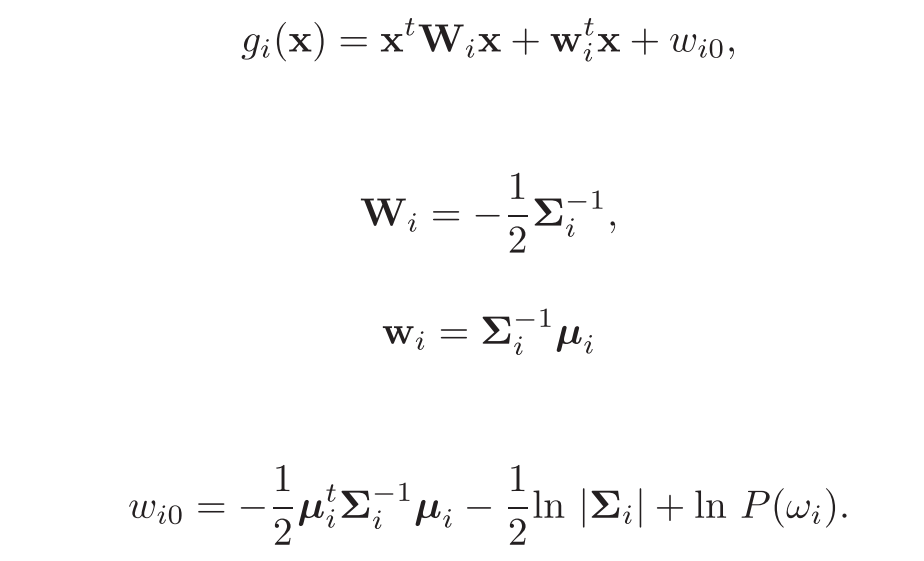

In this case, we covariance matrix are same so first term ie. X.T @ (W1-W2) @ X will be cancel out, so at the end only  ((-w10_minus_w20) - (w1_minus_w2\[0] * vals)) /(w1_minus_w2\[1]) will remains, and due to that we wont get non linear boundry. To generate boundry line, we have to generate values and put into the equation, later I stored it in var x.   